# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics
to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose,the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market.

**The company wants to know:**
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

So that they can decide to invest on the prospective properties or not

In [730]:
#Import Warning
import warnings
warnings.filterwarnings('ignore')

# Import the necessary libraries
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
%matplotlib inline

## Data Reading

In [731]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [732]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [733]:
# Check data info feature wise
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [734]:
# Check Statistical info of data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [735]:
#Check data duplicity
df.duplicated().sum()

0

- There are no duplicate entries in the dataset

## Data Cleaning
-  We will check the null values and replace them according to the data dictionary and business needs
-  We will deal with the year columns and derive features suitable for modelling
-  Drop columns which are highly skewed (i.e where a particualr value frquency >=90%) , also the columns not needed during modelling
-  We will check the datatypes of the data , and correct them if necessary

In [736]:
# Checking Null value percentage 
df.isnull().sum()/len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [737]:
# Checking the freqency percentage of the each values in every colu
for column in df.columns:
        print("\n" + column)
        print(df[column].value_counts(normalize=True,dropna=False))


Id
1460    0.000685
479     0.000685
481     0.000685
482     0.000685
483     0.000685
          ...   
976     0.000685
977     0.000685
978     0.000685
979     0.000685
1       0.000685
Name: Id, Length: 1460, dtype: float64

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

LotFrontage
NaN      0.177397
60.0     0.097945
70.0     0.047945
80.0     0.047260
50.0     0.039041
           ...   
106.0    0.000685
38.0     0.000685
138.0    0.000685
140.0    0.000685
137.0    0.000685
Name: LotFrontage, Length: 111, dtype: float64

LotArea
7200     0.017123
9600     0.016438
6000     0.011644
10800    0.009589
9000 

In [738]:
# Replace the null values in GarageYrBlt with the mode values
df['LotFrontage'] = df['LotFrontage'].replace(np.nan , df['LotFrontage'].mean())

#According to data dictionary NA in Alley means 'No Alley'
df['Alley'] = df['Alley'].replace(np.nan , 'No Alley')

#According to data dictionary NA in MasVnrType means 'None' ,No Masonry veneer type is present
df['MasVnrType'] = df['MasVnrType'].replace(np.nan , 'None')

#So when there is no Masonry veneer type the MasVnrArea must be zero
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan , 0)

#According to data dictionary NA in BsmtQual means 'No Basement'
df['BsmtQual'] = df['BsmtQual'].replace(np.nan , 'No Basement')

#According to data dictionary NA in BsmtCond means 'No Basement'
df['BsmtCond'] = df['BsmtCond'].replace(np.nan , 'No Basement')

#According to data dictionary NA in BsmtExposure means 'No Basement'
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan , 'No Basement')

#According to data dictionary NA in BsmtFinType1 means 'No Basement'
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan , 'No Basement')

#According to data dictionary NA in BsmtFinType2 means 'No Basement'
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan , 'No Basement')

#Replace the null values in Electrical column with mode value
df['Electrical'] = df['Electrical'].replace(np.nan , 'SBrkr')

#According to data dictionary NA in FireplaceQu means 'No Fireplace'
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan , 'No Fireplace')

#According to data dictionary NA in GarageType means 'No Garage'
df['GarageType'] = df['GarageType'].replace(np.nan , 'No Garage')

#Replace the null values in GarageYrBlt column with the present year column
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan , 2020.0)

#According to data dictionary NA in GarageFinish means 'No Garage'
df['GarageFinish'] = df['GarageFinish'].replace(np.nan , 'No Garage')

#According to data dictionary NA in GarageQual means 'No Garage'
df['GarageQual'] = df['GarageQual'].replace(np.nan , 'No Garage')

#According to data dictionary NA in GarageCond means 'No Garage'
df['GarageCond'] = df['GarageCond'].replace(np.nan , 'No Garage')

#According to data dictionary NA in PoolQC means 'No Pool'
df['PoolQC'] = df['PoolQC'].replace(np.nan , 'No Pool')

#According to data dictionary NA in Fence means 'No Fence'
df['Fence'] = df['Fence'].replace(np.nan , 'No Fence')

#According to data dictionary NA in MiscFeature means 'None' , No miscellaneous
df['MiscFeature'] = df['MiscFeature'].replace(np.nan , 'None')

In [739]:
#Find the age of the home , subtract the year built with the present year
df['Home_age'] = 2020 - df['YearBuilt']

#Find the age of the garage , subtract the year built with the present year
df['Garage_age'] = 2020 - df['GarageYrBlt']

#Remodelling Gap - Year in which home was remodelled after it was built
df['Remodelling_gap'] = df['YearRemodAdd'] - df['YearBuilt']

In [740]:
# Checking the freqency percentage of the each values in every column
for column in df.columns:
        print("\n" + column)
        print(df[column].value_counts(normalize=True,dropna=False))


Id
1460    0.000685
479     0.000685
481     0.000685
482     0.000685
483     0.000685
          ...   
976     0.000685
977     0.000685
978     0.000685
979     0.000685
1       0.000685
Name: Id, Length: 1460, dtype: float64

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

LotFrontage
70.049958     0.177397
60.000000     0.097945
70.000000     0.047945
80.000000     0.047260
50.000000     0.039041
                ...   
106.000000    0.000685
38.000000     0.000685
140.000000    0.000685
138.000000    0.000685
137.000000    0.000685
Name: LotFrontage, Length: 111, dtype: float64

LotArea
7200     0.017123
9600

Name: GarageYrBlt, dtype: float64

GarageFinish
Unf          0.414384
RFn          0.289041
Fin          0.241096
No Garage    0.055479
Name: GarageFinish, dtype: float64

GarageCars
2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64

GarageArea
0       0.055479
440     0.033562
576     0.032192
240     0.026027
484     0.023288
          ...   
754     0.000685
459     0.000685
458     0.000685
756     0.000685
1418    0.000685
Name: GarageArea, Length: 441, dtype: float64

GarageQual
TA           0.897945
No Garage    0.055479
Fa           0.032877
Gd           0.009589
Po           0.002055
Ex           0.002055
Name: GarageQual, dtype: float64

GarageCond
TA           0.908219
No Garage    0.055479
Fa           0.023973
Gd           0.006164
Po           0.004795
Ex           0.001370
Name: GarageCond, dtype: float64

PavedDrive
Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64

WoodDeckSF
0      0.521233


In [741]:
# Checking the highly skewed columns
#Finding the columns in which a particualr value has a frequency count >= 90% i.e the column is higly skewed
most_freq_value = ''                   # the most freqent value in a column
freq_lst = []                          # List of the frequencies of the highest frquency value in each column

for column in df.columns:
    most_freq_value = df[column].value_counts().nlargest(n=1).index[0]
    count = 0
    for i in df[column]:
        if i==most_freq_value:
            count+=1
    frequency = round((count/len(df)*100),2)
    freq_lst.append(frequency)

#Check whether we have any column in which a particualr has frequency rate more than 90%
freq_dict = dict(zip(df.columns , freq_lst))
hskew_columns =[]                       #Columns which have a high skew rate >=90%
for key , value in freq_dict.items():
    if freq_dict[key] >= 90.0:
        hskew_columns.append(key)
        

print("Columns which are highly skewed :" , hskew_columns)

Columns which are highly skewed : ['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal']


In [742]:
#drop columns which are highly skewed - hskew_columns
df.drop( hskew_columns , axis = 1 , inplace = True )

In [743]:
df.drop(['Id','YearBuilt','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageYrBlt','YearRemodAdd'] , axis=1 , inplace = True)

- Id column is dropped , since it is a unique column and redundant in model building
- On inspection we find that **TotalBsmtSF** = **BsmtFinSF1** + **BsmtFinSF2** + **BsmtUnfSF** , so we drop these 3 variables
- Also drop the columns which were used to calculate age

In [744]:
# Correct the datatypes    
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['MoSold'] = df['MoSold'].astype('object')
df['YrSold'] = df['YrSold'].astype('object')

 - From Data dictionary ,we find that **MSSubClass** is a categorical variable
 - **OverallQual** and **OverallCond** are the ratings which can be a category but do not represent count or measurements
 - **MoSold** and **YrSold** are the dates so object type would be suitable

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   object 
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1460 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   LotShape         1460 non-null   object 
 5   LandContour      1460 non-null   object 
 6   LotConfig        1460 non-null   object 
 7   Neighborhood     1460 non-null   object 
 8   Condition1       1460 non-null   object 
 9   BldgType         1460 non-null   object 
 10  HouseStyle       1460 non-null   object 
 11  OverallQual      1460 non-null   object 
 12  OverallCond      1460 non-null   object 
 13  RoofStyle        1460 non-null   object 
 14  Exterior1st      1460 non-null   object 
 15  Exterior2nd      1460 non-null   object 
 16  MasVnrType       1460 non-null   object 
 17  MasVnrArea    

In [746]:
df.shape

(1460, 56)

## Data Correlation and Distribution

In [747]:
#Corelation Matrix
corr = df.corr()
corr

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,Home_age,Garage_age,Remodelling_gap
LotFrontage,1.000000,0.306795,0.178699,0.363358,0.414266,0.072483,0.368392,0.091481,0.180424,0.048258,...,0.235755,0.269729,0.323663,0.077106,0.137454,0.009790,0.334901,-0.117598,-0.024095,-0.075316
LotArea,0.306795,1.000000,0.103321,0.260833,0.299475,0.050986,0.263116,0.158155,0.126031,0.014259,...,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.263843,-0.014228,0.050320,-0.005926
MasVnrArea,0.178699,0.103321,1.000000,0.360067,0.339850,0.173800,0.388052,0.083010,0.272999,0.199108,...,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.472614,-0.311600,-0.184760,-0.235602
TotalBsmtSF,0.363358,0.260833,0.360067,1.000000,0.819530,-0.174512,0.454868,0.307351,0.323722,-0.048804,...,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.613581,-0.391452,-0.230860,-0.237527
1stFlrSF,0.414266,0.299475,0.339850,0.819530,1.000000,-0.202646,0.566024,0.244671,0.380637,-0.119916,...,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.605852,-0.281986,-0.154161,-0.145203
2ndFlrSF,0.072483,0.050986,0.173800,-0.174512,-0.202646,1.000000,0.687501,-0.169494,0.421378,0.609707,...,0.194561,0.183926,0.138347,0.092165,0.208026,0.061989,0.319334,-0.010308,-0.042053,0.105388
GrLivArea,0.368392,0.263116,0.388052,0.454868,0.566024,0.687501,1.000000,0.034836,0.630012,0.415772,...,0.461679,0.467247,0.468997,0.247433,0.330224,0.009113,0.708624,-0.199010,-0.150783,-0.003163
BsmtFullBath,0.091481,0.158155,0.083010,0.307351,0.244671,-0.169494,0.034836,1.000000,-0.064512,-0.030905,...,0.137928,0.131881,0.179189,0.175315,0.067341,-0.049911,0.227122,-0.187599,-0.095662,-0.130718
FullBath,0.180424,0.126031,0.272999,0.323722,0.380637,0.421378,0.630012,-0.064512,1.000000,0.136381,...,0.243671,0.469672,0.405656,0.187703,0.259977,-0.115093,0.560664,-0.468271,-0.394011,-0.207499
HalfBath,0.048258,0.014259,0.199108,-0.048804,-0.119916,0.609707,0.415772,-0.030905,0.136381,1.000000,...,0.203649,0.219178,0.163549,0.108080,0.199740,-0.095317,0.284108,-0.242656,-0.138167,-0.144791


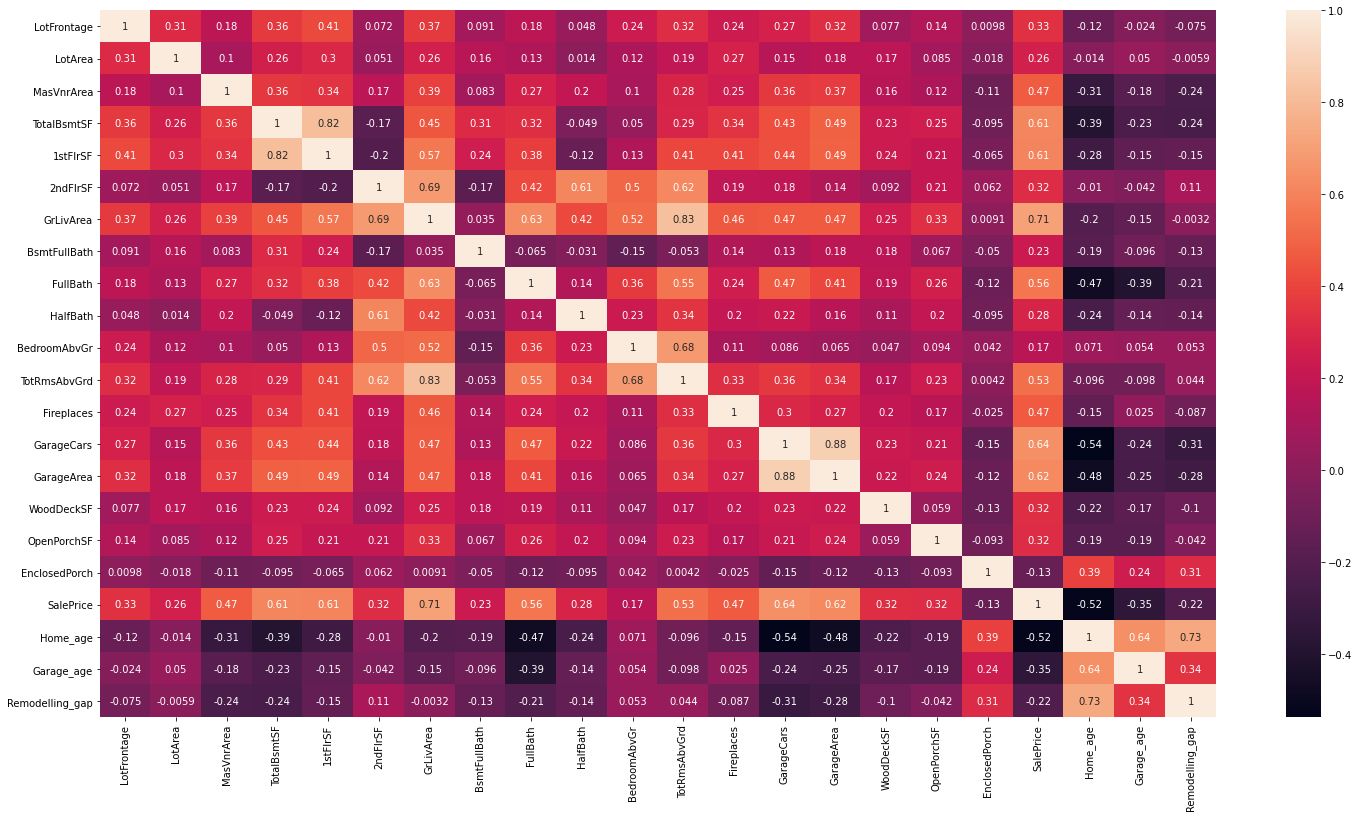

In [748]:
#Heatmap to check the correlation among the variables
import seaborn as sns
plt.figure(figsize = (25,13))
sns.heatmap(corr , annot = True)
plt.show()

- From the heatmap we conclude
    - The **saleprice** of the house mainly has positivie corelation with **GrLivArea**,**GarageCars**,**GarageArea**,**1stFlrSF**,**TotalBsmtSF** and **FullBath** 
    - The **saleprice** of the house mainly has negative corelation with **HomeAge** ,**GarageAge** and **Remodelling_dap**
    
    - **GarageCars** and **GarageArea** has the highest correlation of 0.88
    - Apart from that **GrLivArea** and **TotRmsAbvGrd** has the correlation of 0.83
    - **TotalBsmtSF** and **1stFlrSF** has a positive correlation ogf 0.82 
    - **Home_age** and **GarageCars** has the highest negative corelation of -0.54

In [749]:
#To plot the graphs we separate the numeric and categorical variables based on the datatype
df_numeric = df.select_dtypes(include=['int64','float64'])
df_categorical = df.select_dtypes(include=['object'])
df_numeric_col = (df[df_numeric.columns.tolist()])
df_categorical_col = (df[df_categorical.columns.tolist()]) 

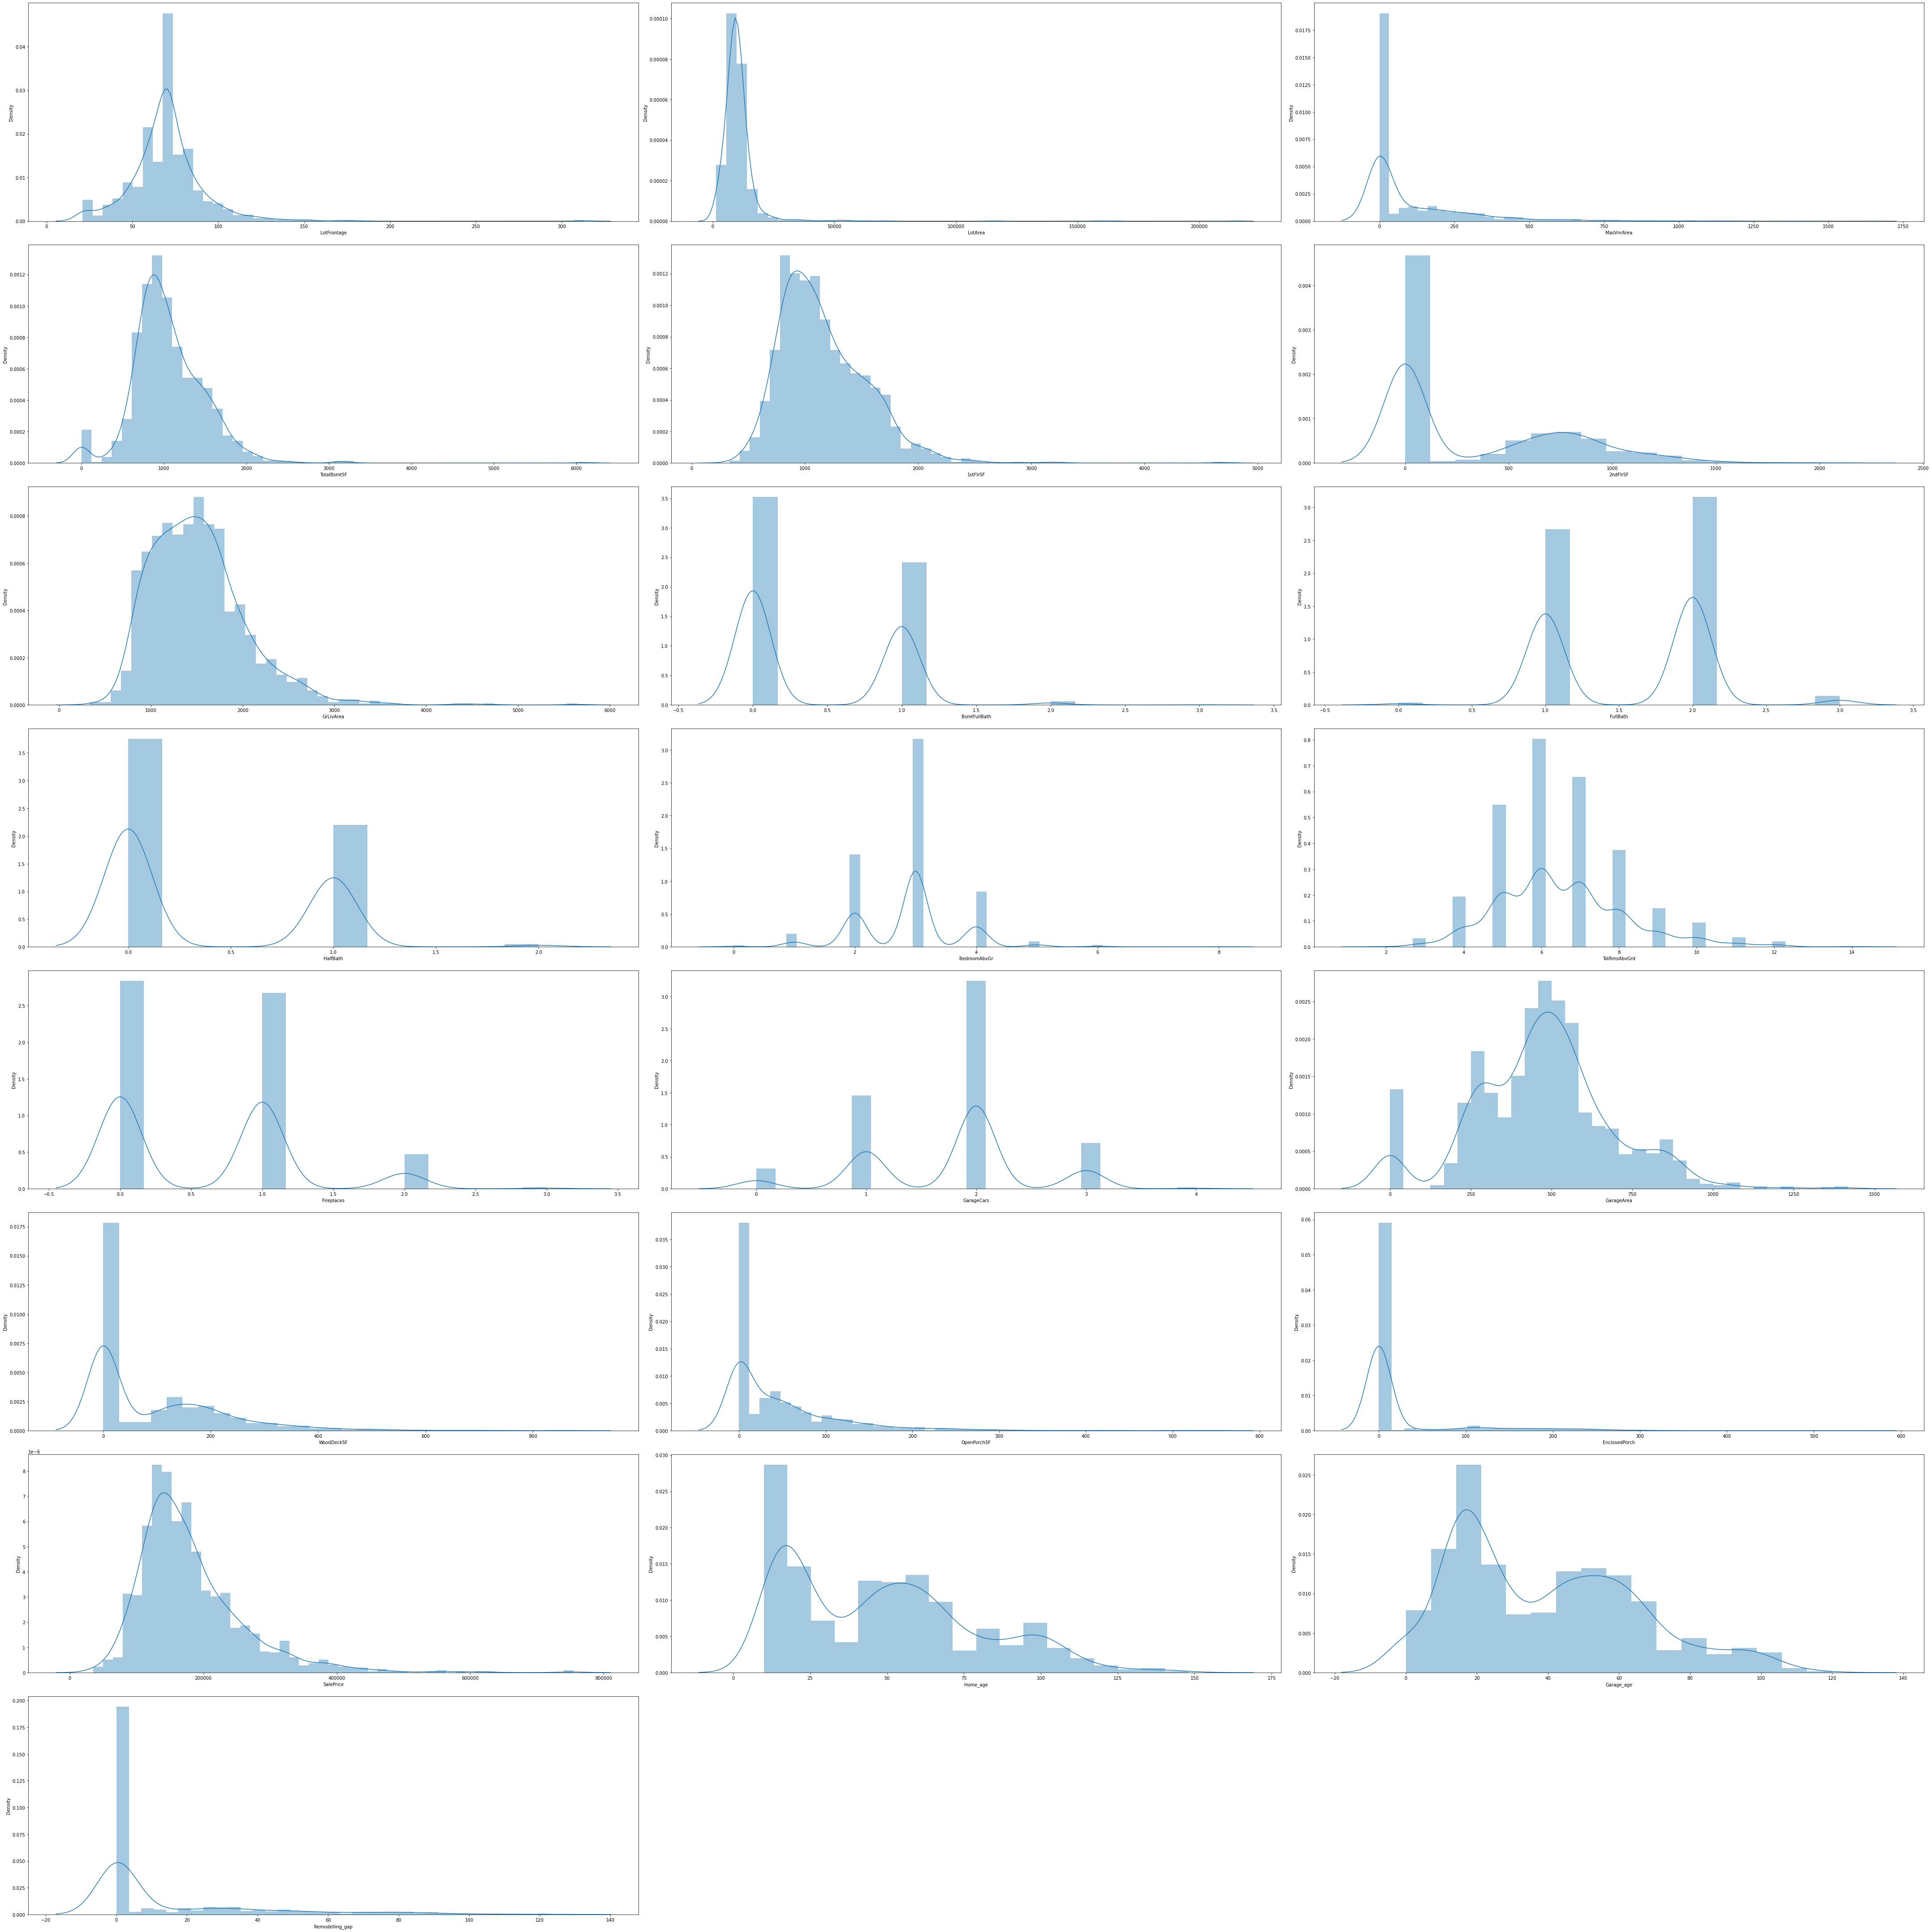

In [750]:
#Distribution of values in numerical columns 
plt.figure(figsize =(60,60))
for i in enumerate(df_numeric_col):
    plt.subplot(8,3,i[0]+1)
    sns.distplot(df[i[1]])
plt.tight_layout()
plt.show()

- **LotFrontage** , **TotalBsmtSF** , **GrLivArea** , **SalePrice** , **Remodelling_gap** , **LotArea** , **1stFlrSF** **OpenPorchSF** , **MasVnrArea** and **EnclosedPorch** are unimodular
- **HalfBath** , **Fireplaces** , **WoodDeckSF** , **BsmtFullBath** , **BedroomAbvGr** , **GarageCars** , **Home_age** , **2ndFlrSF** , **FullBath** , **TotRmsAbvGrd** , **GarageArea** and **Garage_age** are bi and multi modular 

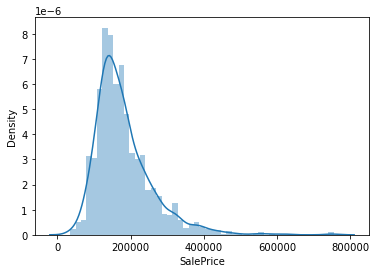

In [797]:
sns.distplot(df['SalePrice'])
plt.show()

- The saleprice of most of the houses lies in the range of 1000000 to 200000 and it is unimodular

## Data Preparation
- Data Encoding - Create categorical rating columns to numeric , create dummies
- Test train split
- Scaling of Data

### Data Encoding

In [751]:
# Convert categorical rating columns with numeric rating from 0 - 5
df['ExterQual'] = df['ExterQual'].map({'Ex': 5, "Gd": 4 , "TA":3 , "Fa":2 , "Po":1})
df['ExterCond'] = df['ExterCond'].map({'Ex': 5, "Gd": 4 , "TA":3 , "Fa":2 , "Po":1})
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, "Gd": 4 , "TA":3 , "Fa":2 , "Po":1 , "No Basement" :0 })
df['BsmtCond'] = df['BsmtCond'].map({'Ex': 5, "Gd": 4 , "TA":3 , "Fa":2 , "Po":1 , "No Basement" :0 })
df['HeatingQC'] = df['HeatingQC'].map({'Ex': 5, "Gd": 4 , "TA":3 , "Fa":2 , "Po":1})
df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, "Gd": 4 , "TA":3 , "Fa":2 , "Po":1})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, "Gd": 4 , "TA":3 , "Fa":2 , "Po":1 , "No Fireplace" :0 })
df['GarageQual'] = df['GarageQual'].map({'Ex': 5, "Gd": 4 , "TA":3 , "Fa":2 , "Po":1 , "No Garage" :0 })

In [752]:
df['FireplaceQu']

0       0
1       3
2       3
3       4
4       3
       ..
1455    3
1456    3
1457    4
1458    0
1459    0
Name: FireplaceQu, Length: 1460, dtype: int64

In [753]:
df_dummies = pd.get_dummies(df_categorical_col, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [754]:
df_numeric_col.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,Home_age,Garage_age,Remodelling_gap
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.117123,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,...,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,180921.195890,48.732192,39.191781,13.597945
std,22.024023,9981.264932,180.731373,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,...,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,79442.502883,30.202904,25.807431,24.476465
min,21.000000,1300.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,10.000000,0.000000,0.000000
25%,60.000000,7553.500000,0.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,129975.000000,20.000000,17.000000,0.000000
50%,70.049958,9478.500000,0.000000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,163000.000000,47.000000,35.500000,0.000000
75%,79.000000,11601.500000,164.250000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,...,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,214000.000000,66.000000,58.000000,20.000000
90%,92.000000,14381.700000,335.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,...,1.000000,3.000000,757.100000,262.000000,130.000000,112.000000,278000.000000,95.100000,72.000000,51.000000
95%,104.000000,17401.150000,456.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,...,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,326100.000000,104.000000,90.000000,73.000000
99%,137.410000,37567.640000,791.280000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,...,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,442567.010000,120.820000,102.820000,96.000000


In [755]:
# add the dummies to the original dataframe and drop the original categorical variables
df = pd.concat([df , df_dummies] , axis = 1)

In [756]:
df.drop(df_categorical_col , axis = 1 , inplace = True)

In [757]:
df.shape

(1460, 241)

### Train Test Split

In [758]:
X = df.drop(['SalePrice'] , axis = 1)   #Put the feature variable to X
y = df['SalePrice']   #Put the response variable to Y
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=240)

In [759]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100) 

### Scaling

In [760]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling_var = X.columns
X[scaling_var] = scaler.fit_transform(X[scaling_var])

In [761]:
X.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.229372,-0.207142,0.514104,-0.459303,-0.793434,1.161852,0.370333,1.107810,0.789741,1.227585,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,0.451936,-0.091886,-0.570750,0.466465,0.257140,-0.795163,-0.482512,-0.819964,0.789741,-0.761621,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-0.093110,0.073480,0.325915,-0.313369,-0.627826,1.189351,0.515013,1.107810,0.789741,1.227585,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-0.456474,-0.096897,-0.570750,-0.687324,-0.521734,0.937276,0.383659,1.107810,-1.026041,-0.761621,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.633618,0.375148,1.366489,0.199680,-0.045611,1.617877,1.299326,1.107810,0.789741,1.227585,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [762]:
X.describe()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,3.410514e-16,-4.202783e-17,-3.939010e-17,2.063038e-16,7.686013e-17,-3.269835e-17,-1.446332e-16,4.106304e-17,2.770995e-16,-3.011290e-17,...,-1.156162e-15,-4.346694e-16,-3.406712e-16,-2.103530e-17,6.522180e-16,-5.270708e-16,4.404772e-17,-1.320291e-16,-5.969350e-17,2.098778e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-2.227875e+00,-9.237292e-01,-5.707501e-01,-2.411167e+00,-2.144172e+00,-7.951632e-01,-2.249120e+00,-8.199644e-01,-2.841822e+00,-7.616207e-01,...,-5.862104e-02,-5.862104e-02,-3.019617e-01,-4.537649e-02,-2.562180e+00,-5.241424e-02,-9.103457e-02,-1.178511e-01,-2.138345e+00,-3.059950e-01
25%,-4.564744e-01,-2.969908e-01,-5.707501e-01,-5.966855e-01,-7.261556e-01,-7.951632e-01,-7.347485e-01,-8.199644e-01,-1.026041e+00,-7.616207e-01,...,-5.862104e-02,-5.862104e-02,-3.019617e-01,-4.537649e-02,3.902926e-01,-5.241424e-02,-9.103457e-02,-1.178511e-01,4.676514e-01,-3.059950e-01
50%,6.454645e-16,-1.040633e-01,-5.707501e-01,-1.503334e-01,-1.956933e-01,-7.951632e-01,-9.797004e-02,-8.199644e-01,7.897405e-01,-7.616207e-01,...,-5.862104e-02,-5.862104e-02,-3.019617e-01,-4.537649e-02,3.902926e-01,-5.241424e-02,-9.103457e-02,-1.178511e-01,4.676514e-01,-3.059950e-01
75%,4.065156e-01,1.087080e-01,3.383686e-01,5.491227e-01,5.915905e-01,8.731117e-01,4.974036e-01,1.107810e+00,7.897405e-01,1.227585e+00,...,-5.862104e-02,-5.862104e-02,-3.019617e-01,-4.537649e-02,3.902926e-01,-5.241424e-02,-9.103457e-02,-1.178511e-01,4.676514e-01,-3.059950e-01
max,1.103492e+01,2.051827e+01,8.285201e+00,1.152095e+01,9.132681e+00,3.936963e+00,7.855574e+00,4.963359e+00,2.605522e+00,3.216791e+00,...,1.705872e+01,1.705872e+01,3.311678e+00,2.203785e+01,3.902926e-01,1.907878e+01,1.098484e+01,8.485281e+00,4.676514e-01,3.268027e+00


## Model Building

In [763]:
# Building a Linear Regression model first
from sklearn import linear_model , metrics
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train ,y_train)

y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true = y_train , y_pred = y_train_pred)

0.9042866336976288

In [764]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true = y_test , y_pred = y_test_pred)

0.8515306900700857

- The train and test data are very close to be fitted for the regression line

In [765]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
cols = X.columns
cols = cols.insert( 0 , "constant")
final_var_lm = dict(zip(cols , model_parameters))

In [766]:
{k :v for k,v in sorted(final_var_lm.items() ,key=lambda item:item[1])}

{'BsmtCond_Po': -72887.0814184012,
 'Exterior1st_ImStucc': -48875.74838173558,
 'GarageQual_Po': -47673.107764350185,
 'GarageQual_Fa': -33461.713933439496,
 'HeatingQC_Po': -29068.2322867579,
 'BsmtQual_Gd': -28037.12176748177,
 'KitchenQual_TA': -24949.35434455177,
 'BsmtQual_TA': -24737.537299208372,
 'KitchenQual_Gd': -24031.843614865866,
 'KitchenQual_Fa': -23003.16911772903,
 'HouseStyle_2.5Unf': -21594.486834802276,
 'ExterCond_Gd': -20810.957281824496,
 'MSSubClass_160': -20803.26835235407,
 'BsmtFinType2_BLQ': -20339.912825507326,
 'BsmtCond_No Basement': -20083.402011489903,
 'BsmtQual_No Basement': -20083.402011489306,
 'BsmtFinType1_No Basement': -20083.40201148898,
 'GarageQual_TA': -19305.37356069618,
 'MSSubClass_120': -19250.434390563496,
 'MSSubClass_180': -18718.25105026369,
 'OverallQual_2': -18117.233449794436,
 'ExterCond_TA': -17930.795955995523,
 'BsmtQual_Fa': -17920.727165201868,
 'Exterior1st_CemntBd': -16993.765185557266,
 'BsmtFinType2_LwQ': -16789.596087000

## Ridge Regression

In [767]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [768]:
#list of alphas to tune
params = {'alpha' : [0.0001 , 0.001 , 0.01 , 0.05 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0 ,
                  2.0 , 3.0 , 4.0 , 5.0 , 6.0 , 7.0 , 8.0 , 9.0 , 10.0 , 20 , 50 , 100 , 500 , 1000]}

ridge = Ridge()

#cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train , y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [769]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010971,3.234067e-07,0.004787,3.988266e-04,0.0001,{'alpha': 0.0001},-21521.261349,-19727.286102,-22254.139045,-21546.502555,...,-21721.536977,1241.440030,26,-15712.685407,-12655.850864,-14403.644659,-15617.244517,-15130.388876,-14703.962865,1124.134999
1,0.010973,6.311429e-04,0.004186,4.000400e-04,0.001,{'alpha': 0.001},-21518.434713,-19725.585392,-22252.445921,-21537.734685,...,-21717.542481,1240.707252,25,-15712.368011,-12655.714447,-14403.415746,-15616.975761,-15130.114571,-14703.717707,1124.075497
2,0.010971,6.312789e-04,0.004786,3.987554e-04,0.01,{'alpha': 0.01},-21490.340469,-19709.522457,-22235.804460,-21453.917711,...,-21678.719982,1233.353651,24,-15709.259700,-12654.695035,-14401.091657,-15614.603380,-15127.391608,-14701.408276,1123.421270
3,0.010771,3.987551e-04,0.003989,3.371748e-07,0.05,{'alpha': 0.05},-21380.998031,-19651.270066,-22181.656980,-21187.963666,...,-21541.905481,1204.388968,23,-15697.966386,-12656.049226,-14390.717399,-15609.341960,-15116.628702,-14694.140735,1119.789089
4,0.010572,4.885387e-04,0.004189,3.989458e-04,0.1,{'alpha': 0.1},-21264.625243,-19599.740665,-22124.763891,-20927.532184,...,-21400.639126,1170.654708,22,-15689.156460,-12661.380722,-14378.515881,-15604.809563,-15110.468312,-14688.866188,1115.732573


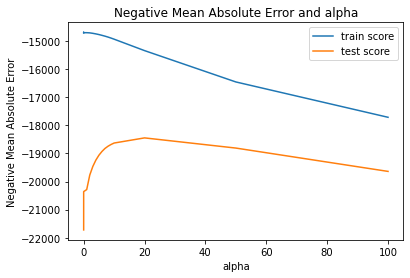

In [770]:
#plotting mean test and train scores with alpha
cv_results['param_alpha']  = cv_results['param_alpha'].astype('int32')

#plotting
plt.plot(cv_results['param_alpha'] , cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'] , cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and alpha')
plt.legend(['train score' , 'test score'] , loc = 'upper right')
plt.show()

In [771]:
model_cv.best_params_

{'alpha': 20}

- We can see that the tradeoff point is 20, but from the graph we can see that as alpha increases the Negative mean absolute error icreases till tradeoff point and after that it a slow decrease for test data where as for the train data as the alpha is increasing the Negative mean absolute error is constantly decreasing , so we say this model might slightly overfit

In [772]:
alpha = 20
ridge = Ridge(alpha = alpha)
ridge.fit(X_train , y_train)
ridge.coef_

array([-1.39228036e+02,  4.30389793e-01,  2.47537253e+01,  7.34040516e+00,
        4.07223376e+01,  6.35268176e+01,  8.47208122e+00,  6.27691073e+03,
        5.16471354e+03,  1.02580601e+03, -1.91994249e+03, -7.80738189e+01,
        4.71441430e+03,  1.31951096e+04, -3.27229198e+00,  1.31133914e+01,
       -2.96513055e+00,  1.77436141e+01, -5.48125574e+02, -6.02968938e-02,
        1.77153206e+02, -2.00443744e+03,  3.28992734e+02,  3.95619299e+03,
        1.08414168e+03, -4.08939304e+03,  5.53484978e+03, -1.08115303e+02,
        1.63851634e+02, -1.45740124e+03, -6.31969415e+03, -8.37766192e+03,
       -8.25905768e+03, -2.47113265e+03, -6.22604415e+03,  3.73701430e+03,
        2.01760072e+03,  6.05144529e+03, -2.19043289e+03,  3.04514150e+03,
       -8.08205423e+03,  1.33855564e+03,  7.35218798e+03,  5.10694651e+03,
        9.67590735e+03,  7.84949927e+03, -5.29247791e+03, -9.19015214e+02,
       -1.09102910e+03, -6.96428936e+02,  5.38090285e+02,  2.03290337e+03,
        1.32445858e+03, -

In [773]:
#model with optimal value 20
Rd = Ridge(alpha = 20)
Rd.fit(X_train , y_train)

y_train_pred = Rd.predict(X_train)
metrics.r2_score(y_true = y_train , y_pred = y_train_pred)

0.8820681536302739

In [774]:
y_test_pred = Rd.predict(X_test)
metrics.r2_score(y_true = y_test , y_pred = y_test_pred)

0.8579713284794854

In [775]:
model_parameters = list(Rd.coef_)
model_parameters.insert(0, Rd.intercept_)
cols = X.columns
cols = cols.insert( 0 , "constant")
final_var_rd = dict(zip(cols , model_parameters))

In [776]:
{k :v for k,v in sorted(final_var_rd.items() ,key=lambda item:item[1])}

{'BsmtQual_Gd': -18403.039904282374,
 'Neighborhood_Edwards': -17644.408097710257,
 'KitchenQual_Gd': -15016.999840347775,
 'KitchenQual_TA': -14268.807709295357,
 'OverallQual_6': -12302.123460467037,
 'OverallQual_5': -11571.864893589422,
 'BsmtQual_TA': -11541.216651626746,
 'OverallQual_4': -10132.980261086723,
 'Neighborhood_Mitchel': -9561.346631653418,
 'BldgType_Twnhs': -9397.44382466286,
 'BldgType_TwnhsE': -9303.010255152409,
 'HouseStyle_2Story': -9161.218172002085,
 'ExterQual_TA': -8974.101909882103,
 'MSSubClass_120': -8377.661919669175,
 'MSSubClass_160': -8259.057684901018,
 'LotShape_IR3': -8082.054226048593,
 'OverallCond_4': -7893.32364674059,
 'BsmtExposure_No': -7832.473530786462,
 'OverallCond_3': -7567.6515720576435,
 'KitchenQual_Fa': -7534.468347917641,
 'Neighborhood_Sawyer': -7337.33083150706,
 'Condition1_PosN': -6806.7838809244695,
 'OverallQual_7': -6763.052911716745,
 'Exterior2nd_Stucco': -6598.675772055643,
 'OverallCond_5': -6554.687950875221,
 'BldgTy

## Lasso Regression 

In [777]:
lasso = Lasso()

#cross validation
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train , y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   23.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [778]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.163562,0.001995,0.004588,0.000489,0.0001,{'alpha': 0.0001},-21523.542639,-19764.279074,-22250.416498,-21496.894133,...,-21733.914505,1253.688228,28,-15712.165362,-12655.494085,-14402.678088,-15617.652502,-15130.224452,-14703.642898,1124.277218
1,0.166554,0.005463,0.004588,0.000489,0.001,{'alpha': 0.001},-21523.408046,-19763.928900,-22250.341592,-21496.378588,...,-21732.245779,1251.613811,27,-15712.144574,-12655.469287,-14402.668100,-15617.639312,-15130.217074,-14703.627669,1124.280354
2,0.169347,0.005255,0.004389,0.000489,0.01,{'alpha': 0.01},-21522.109850,-19760.440543,-22249.550158,-21491.221422,...,-21724.673284,1244.689095,26,-15711.938094,-12655.319667,-14402.674825,-15617.563483,-15130.137195,-14703.526653,1124.279075
3,0.177924,0.008142,0.004588,0.000489,0.05,{'alpha': 0.05},-21516.420588,-19744.904555,-22246.032987,-21469.526968,...,-21713.795611,1247.912947,25,-15711.063415,-12654.664047,-14402.738721,-15617.389444,-15129.785815,-14703.128288,1124.302714
4,0.175131,0.008911,0.004588,0.000489,0.1,{'alpha': 0.1},-21508.938818,-19725.478853,-22241.638447,-21458.775311,...,-21704.066963,1252.345002,24,-15709.678397,-12653.849700,-14402.818242,-15617.305774,-15129.221375,-14702.574698,1124.290553


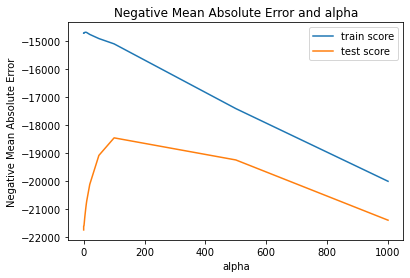

In [779]:
#plotting mean test and train scores with alpha
cv_results['param_alpha']  = cv_results['param_alpha'].astype('int32')

#plotting
plt.plot(cv_results['param_alpha'] , cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'] , cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and alpha')
plt.legend(['train score' , 'test score'] , loc = 'upper right')
plt.show()

In [780]:
model_cv.best_params_

{'alpha': 100}

- We can see that the tradeoff point is 20, but from the graph we can see that as alpha increases the Negative mean absolute error icreases till tradeoff point and after that it a slow decrease for test data where as for the train data as the alpha is increasing the Negative mean absolute error is constantly decreasing , so we say this model might slightly overfit same as in the Ridge Regression however we find that the lasso helps in feature selection by performing parameters shrinkage i.e its coefficient to 0

In [781]:
alpha = 100
lasso = Lasso(alpha = alpha)
lasso.fit(X_train , y_train)
lasso.coef_

array([-1.62686154e+02,  4.49541725e-01,  1.37054638e+01,  5.33663829e+00,
        3.22991688e+01,  5.66668008e+01,  1.17154567e+01,  7.08317994e+03,
        4.21782912e+03,  5.11641007e+02, -3.10817324e+02, -2.11423510e+02,
        2.41378644e+03,  1.34341263e+04, -1.35607083e+01,  1.06120786e+01,
       -9.12728400e+00,  1.52155075e+01, -4.63917864e+02, -3.21406373e+01,
        1.47216696e+02, -7.03393227e+02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -3.44290121e+03,  8.43957008e+02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.12092664e+04, -0.00000000e+00,
       -8.09271805e+01, -0.00000000e+00, -9.97264003e+03,  0.00000000e+00,
        0.00000000e+00,  5.81371769e+03, -0.00000000e+00,  2.98058367e+03,
       -9.43062407e+03,  8.82727855e+02,  7.74749847e+03,  9.90732977e+03,
        1.30688910e+04,  7.83963808e+03, -6.31049186e+03, -0.00000000e+00,
       -3.17241077e+02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.42710354e+03,  

In [782]:
#model with optimal value 100
Ls = Lasso(alpha = 100)
Ls.fit(X_train , y_train)

y_train_pred = Ls.predict(X_train)
metrics.r2_score(y_true = y_train , y_pred = y_train_pred)

0.8918332932765912

In [783]:
y_test_pred = Ls.predict(X_test)
metrics.r2_score(y_true = y_test , y_pred = y_test_pred)

0.8645754350823954

In [784]:
model_parameters = list(Ls.coef_)
model_parameters.insert(0, Ls.intercept_)
cols = X.columns
cols = cols.insert( 0 , "constant")
final_var_ls = dict(zip(cols , model_parameters))

In [785]:
{k :v for k,v in sorted(final_var_ls.items() ,key=lambda item:item[1])}

{'BldgType_Twnhs': -22826.365734190942,
 'BsmtQual_Gd': -20764.8623558458,
 'BldgType_TwnhsE': -19284.144135891573,
 'Neighborhood_Edwards': -18550.040974045707,
 'KitchenQual_TA': -17974.434102473242,
 'KitchenQual_Gd': -17114.7296781931,
 'BsmtQual_TA': -14833.20734756033,
 'BsmtExposure_No Basement': -13639.218396257169,
 'OverallCond_3': -12831.077196039849,
 'KitchenQual_Fa': -12368.823745527834,
 'MSSubClass_90': -11209.266385896193,
 'MSSubClass_190': -9972.64003177394,
 'HouseStyle_2Story': -9953.890111751638,
 'OverallCond_5': -9719.97726521058,
 'OverallCond_4': -9467.753536763199,
 'LotShape_IR3': -9430.624068402534,
 'Exterior2nd_Stucco': -9318.633777171888,
 'Neighborhood_Mitchel': -8092.005159474771,
 'Condition1_PosN': -7798.833926719643,
 'Neighborhood_Sawyer': -7572.540766284797,
 'BsmtQual_Fa': -7478.576511773633,
 'Neighborhood_OldTown': -6678.22918673142,
 'LotConfig_FR2': -6310.491856783227,
 'BsmtExposure_No': -6307.812874621328,
 'GarageQual_Fa': -6274.8453382254

## Elastic Net

In [786]:
elasticnet = ElasticNet()

#cross validation
model_cv = GridSearchCV(estimator = elasticnet,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train , y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   25.6s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [787]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.172140,0.008117,0.004987,2.861023e-07,0.0001,{'alpha': 0.0001},-21403.551353,-19659.698892,-22186.380612,-21215.282997,...,-21564.573509,1214.852736,12,-15700.396611,-12655.771051,-14392.575469,-15610.611336,-15118.711406,-14695.613175,1120.590134
1,0.182312,0.011131,0.004788,3.991606e-04,0.001,{'alpha': 0.001},-20664.242365,-19467.248189,-21871.823897,-19967.032248,...,-20839.334228,1064.327466,8,-15669.513165,-12699.625751,-14347.819491,-15594.358607,-15156.198795,-14693.503162,1102.113210
2,0.193283,0.010487,0.004987,3.568323e-07,0.01,{'alpha': 0.01},-18087.824860,-19394.595115,-20891.266209,-17820.609905,...,-19221.420799,1144.001756,3,-15656.020351,-12972.029007,-14342.403118,-15528.042510,-15230.942754,-14745.887548,998.474884
3,0.180317,0.005022,0.004588,4.887724e-04,0.05,{'alpha': 0.05},-16197.990528,-20767.052672,-19716.839976,-16611.083581,...,-18442.806166,1769.091262,1,-16218.259478,-13987.289993,-14919.714715,-15872.086210,-15787.351465,-15356.940372,807.416619
4,0.180517,0.006735,0.004787,3.991605e-04,0.1,{'alpha': 0.1},-15893.877452,-21758.674250,-19892.487810,-16712.344000,...,-18645.532294,2128.888536,2,-16940.298810,-14896.799813,-15758.727316,-16517.167995,-16610.023941,-16144.603575,734.093453


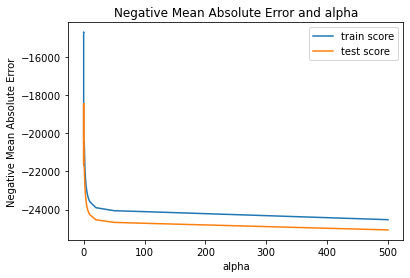

In [788]:
#plotting mean test and train scores with alpha
cv_results['param_alpha']  = cv_results['param_alpha'].astype('int32')

#plotting
plt.plot(cv_results['param_alpha'] , cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'] , cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and alpha')
plt.legend(['train score' , 'test score'] , loc = 'upper right')
plt.show()

In [789]:
model_cv.best_params_

{'alpha': 0.05}

- Unlike the L1 and L2 Regularization in elastic net we see that the difference between the performance metrics is very less and also that the trade off is at 0.05 and the there is straight steep when alpha is 0 and it gradually decreases as when the alpha increases there is a very slow decrease in the Negative mean adsolute error so it overcomes the limitations of both L1 and L2 

In [790]:
alpha = 0.05
elasticnet = ElasticNet(alpha = alpha)
elasticnet.fit(X_train , y_train)
elasticnet.coef_

array([-1.36616423e+02,  4.23650124e-01,  2.65417133e+01,  8.51535239e+00,
        4.18470992e+01,  6.34333734e+01,  7.81868832e+00,  6.07924265e+03,
        4.79820188e+03,  9.23604681e+02, -2.14161095e+03, -1.36750508e+01,
        5.04658443e+03,  1.26272212e+04, -4.10528790e-01,  1.37174814e+01,
       -2.31719262e+00,  1.80736007e+01, -5.70434898e+02, -1.20998296e+00,
        1.92596246e+02, -1.75522730e+03,  3.82840483e+02,  3.55017147e+03,
        1.11599504e+03, -3.73017084e+03,  5.38848920e+03, -2.37251430e+01,
       -5.64787809e+01, -1.26857882e+03, -5.99101837e+03, -7.67203881e+03,
       -7.62200903e+03, -2.07490860e+03, -5.69453006e+03,  3.39993173e+03,
        1.50746668e+03,  5.66867126e+03, -2.76104993e+03,  2.64333629e+03,
       -7.24880714e+03,  1.09185667e+03,  6.30060633e+03,  4.13320911e+03,
        8.51834170e+03,  7.42558125e+03, -4.38911087e+03, -7.23875032e+02,
       -9.87486585e+02, -5.50596766e+02,  3.25336117e+02,  2.39588473e+03,
        1.17144769e+03, -

In [791]:
#model with optimal value 0.05
En = ElasticNet(alpha = 0.05)
En.fit(X_train , y_train)

y_train_pred = En.predict(X_train)
metrics.r2_score(y_true = y_train , y_pred = y_train_pred)

0.8776163751969422

In [792]:
y_test_pred = En.predict(X_test)
metrics.r2_score(y_true = y_test , y_pred = y_test_pred)

0.8559901336257147

In [793]:
model_parameters = list(En.coef_)
model_parameters.insert(0, En.intercept_)
cols = X.columns
cols = cols.insert( 0 , "constant")
final_var_En = dict(zip(cols , model_parameters))

In [794]:
{k :v for k,v in sorted(final_var_En.items() ,key=lambda item:item[1])}

{'BsmtQual_Gd': -17314.34391416029,
 'Neighborhood_Edwards': -16502.19547618014,
 'KitchenQual_Gd': -13907.273347084092,
 'KitchenQual_TA': -13129.971385036104,
 'OverallQual_6': -11680.829639691576,
 'OverallQual_5': -10574.561918014027,
 'BsmtQual_TA': -10302.624938192483,
 'ExterQual_TA': -8928.351561825553,
 'OverallQual_4': -8923.617149506052,
 'Neighborhood_Mitchel': -8559.896710648525,
 'BldgType_TwnhsE': -8558.683828457448,
 'HouseStyle_2Story': -8547.036207264622,
 'BldgType_Twnhs': -8475.013126572423,
 'BsmtExposure_No': -7713.797804218624,
 'MSSubClass_120': -7672.038812289747,
 'MSSubClass_160': -7622.009031510136,
 'OverallCond_4': -7439.528471037397,
 'LotShape_IR3': -7248.807142266924,
 'Neighborhood_Sawyer': -6709.609566391301,
 'OverallCond_3': -6681.4143146224,
 'OverallQual_7': -6451.647555017846,
 'OverallCond_5': -6390.943346968398,
 'KitchenQual_Fa': -6243.589924219367,
 'Exterior2nd_Stucco': -6030.449775640743,
 'MoSold_10': -6004.706069414544,
 'Condition1_PosN'

## Forward Feature Selection

In [795]:
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) +  np.log(n) *num_params
    return bic

In [796]:
features = X_train.columns

regression = LinearRegression()

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train[testing_features], y_train)
        y_pred = regression.predict(X_test[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['GrLivArea'] 
AIC:  22276.13432463923 
BIC:  22285.99140027556
Selected features:  ['GrLivArea', 'Home_age'] 
AIC:  21939.12542249445 
BIC:  21953.911035948942
Selected features:  ['GrLivArea', 'Home_age', 'OverallQual_9'] 
AIC:  21702.43416013275 
BIC:  21722.14831140541
Selected features:  ['GrLivArea', 'Home_age', 'OverallQual_9', 'TotalBsmtSF'] 
AIC:  21580.709355011175 
BIC:  21605.352044101997
Selected features:  ['GrLivArea', 'Home_age', 'OverallQual_9', 'TotalBsmtSF', 'OverallQual_10'] 
AIC:  21499.592998162418 
BIC:  21529.164225071407
Selected features:  ['GrLivArea', 'Home_age', 'OverallQual_9', 'TotalBsmtSF', 'OverallQual_10', 'OverallQual_8'] 
AIC:  21410.12132212831 
BIC:  21444.621086855463
Selected features:  ['GrLivArea', 'Home_age', 'OverallQual_9', 'TotalBsmtSF', 'OverallQual_10', 'OverallQual_8', 'KitchenQual_TA'] 
AIC:  21364.47600753517 
BIC:  21403.90431008049
Selected features:  ['GrLivArea', 'Home_age', 'OverallQual_9', 'TotalBsmtSF', 'Over

- Since both Lasso and Ridge Regression shows slight overfitting we will select the top 10 predictors from Elastic Net
    - OverallQual_9
    - Neighborhood_NoRidge
    - Neighborhood_NridgHt
    - OverallQual_10
    - BsmtExposure_Gd
    - Neighborhood_Crawfor
    - GarageCars
    - HouseStyle_1Story
    - Condition1_Norm
    - OverallQual_8

From the above predictors we suggest the pricing of the houses to be good or the company can invest on those houses where
- The overall rating is in the range of 8,9 and 10
- The house should be in the cities NorthRidge , NorthRidgeHeights and Crawford
- The BsmtExposure_Gd : the walkout or the garden level walls should be good
- There must be a good car garage capacity
- the house should be mostly one storey and the condition to be normal